# 3D segmentation example

In [1]:
# %matplotlib notebook
import sys
# sys.path.append('/Users/jakob/Documents/RU/Code/segment')
import watershed3d
# from imutils import random_cmap
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step, axis, figure
# import imutils

load file 

In [2]:
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1.tif'
filename = '/Users/jakob/Documents/RU/Code/watershed3d/segmentation_example/DAPI-1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered.tif'
w = watershed3d.Ws3d(filename)

check histogram of image data

load Ilastik probability mask and plot it

In [3]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

do segmentation without the object classifier

In [4]:
w.segment(cyto_size=2,sigma=(3,3,3), min_distance=2, compactness=0.5, opensize_small_objects=10, remove_small_nuclei=1)

show segmentation

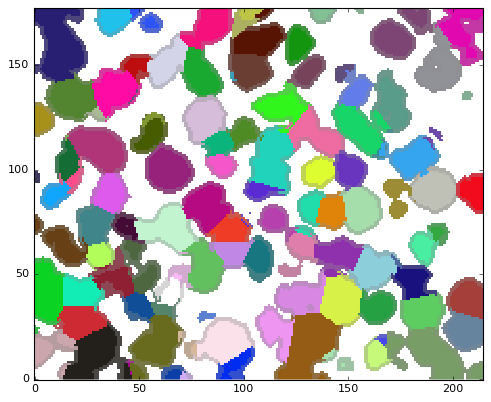

In [5]:
cmap, cmapd = watershed3d.random_cmap(seed=123, return_darker=1)
z=25
imshow(np.ma.masked_equal(w.labels_cyto[z],0), cmap=cmapd)
imshow(np.ma.masked_equal(w.ws[z],0), cmap=cmap)

# figure()
# imshow(np.ma.masked_equal(w.labels_cyto[20], 1), cmap=cmap)
# figure()
# imshow(w.labels_cyto[20], cmap=watershed3d.random_cmap(seed=123))
# imshow(np.ma.masked_where(w.labels_cyto[20]==0,w.labels_cyto[20]), cmap=watershed3d.random_cmap(seed=123))


In [6]:
watershed3d.browse_stack(w)

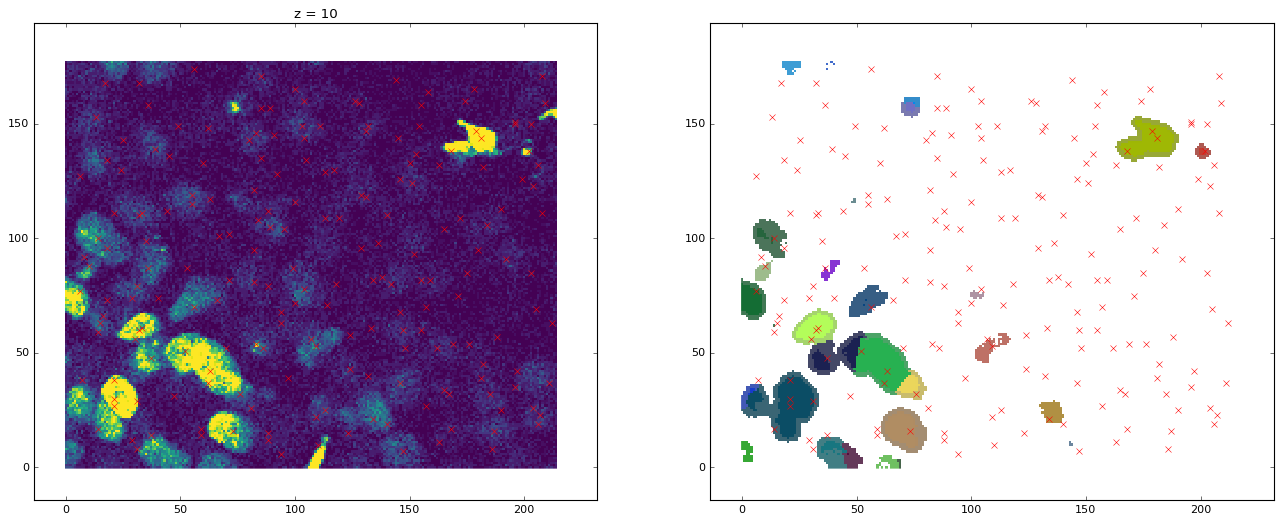

In [10]:
w.show_segmentation(z=10,figsize=(20,10), plot_cyto=1)

In [14]:
np.array(w.df.total_intensity/w.df.total_intensity_cyto)

array([ 5.        ,  5.16666667,  2.6       ,  3.5       ,  2.4       ,
        2.7       ,  3.11111111,  2.1       ,  2.2       ,  2.3       ,
        2.36363636,  4.        ,  2.5       ,  3.75      ,  2.42105263,
        2.8       ,  2.7       ,  3.11111111,  2.5       ,  3.        ,
        3.125     ,  3.11111111,  2.5       ,  3.22222222,  2.6       ,
        2.8       ,  3.        ,  2.88888889,  2.16666667,  3.25      ,
        5.        ,  3.88888889,  3.        ,  3.        ,  2.6       ,
        2.9       ,  3.5       ,  4.42857143,  3.        ,  3.        ,
        2.36363636,  3.11111111,  3.        ,  2.8       ,  3.2       ,
        3.        ,  2.7       ,  2.83333333,  2.63636364,  3.5       ,
        2.66666667,  3.1       ,  2.36363636,  3.3       ,  2.6       ,
        3.625     ,  3.5       ,  3.4       ,  3.875     ,  3.11111111,
        3.33333333,  2.33333333,  3.        ,  3.875     ,  2.8       ,
        3.        ,  2.36363636,  3.        ,  3.33333333,  3.75

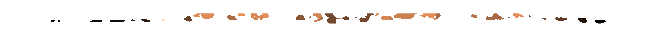

In [8]:
reload(watershed3d)
watershed3d.zview(w, cell_based=True)

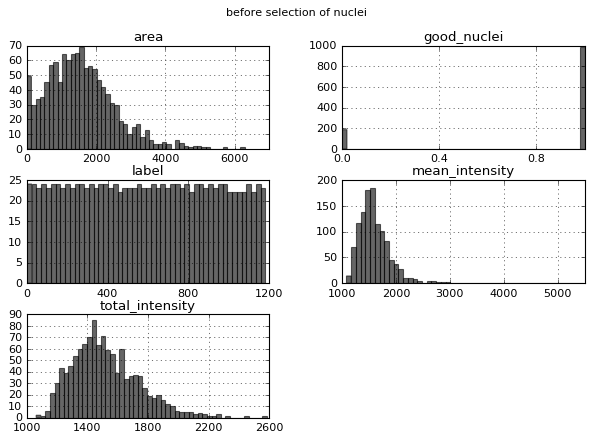

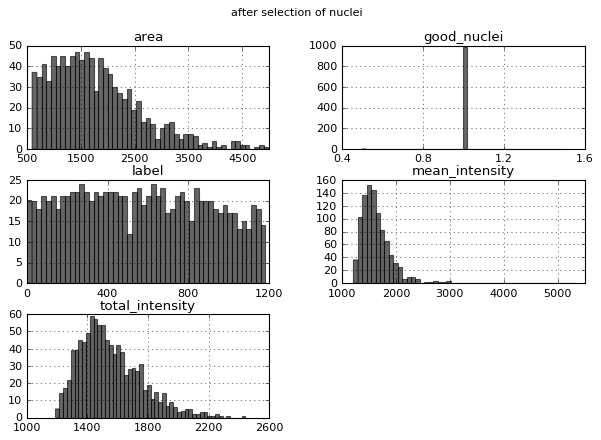

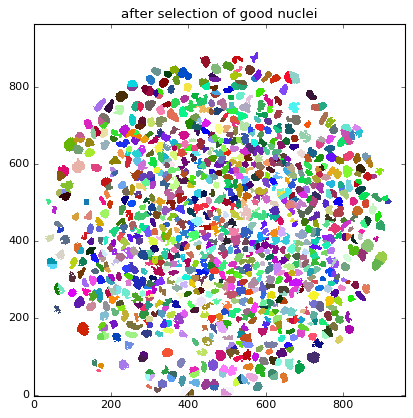

In [9]:
w.select_nuclei(quantiles=[0.2,0.85], cutoff=[600,5000], plot=1)

apply to other channels

In [10]:
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c3.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c2.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c4.tif'

In [11]:
w.apply_to_channels(filename_sox2, 'sox2')
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_sox17, 'sox17')

In [107]:
reload(watershed3d)
watershed3d.dump_mask_and_images(w, 'mytestfile2.hd5', compression=4, write_every_nth_z=3)

In [108]:
with h5py.File("mytestfile2.hd5", "r") as f:
    for key in f:
        print(key)
    bratest = f['bra'][:]
    soxtest = f['sox2'][:]    
    dapistest=f['dapi'][:]
    testmask = f['mask'][:]


bra
dapi
mask
sox17
sox2


(<matplotlib.image.AxesImage at 0x117e9efd0>, (6, 964, 963))

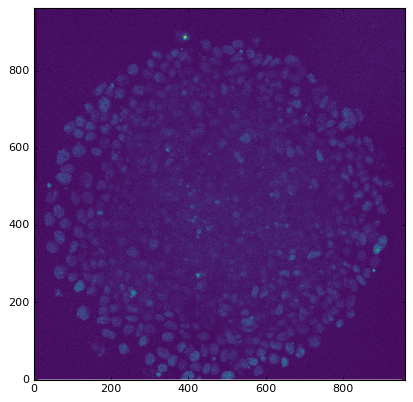

In [109]:
imshow(dapistest[5]), dapistest.shape

In [12]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,centroid_rescaled,label,good_nuclei,sox2,sox2_norm,bra,bra_norm,sox17,sox17_norm
cell_id,,,,,,,,,,,,,
1,1978,1404.5,1444.932760,"[3.36855409505, 258.328109201, 416.110717897]","[3.36855409505, 258.328109201, 416.110717897]",1,True,407.0,0.281674,186.0,0.128726,127.0,0.087893
2,1219,2121.0,2296.000000,"[2.14109926169, 281.821985234, 295.535684988]","[2.14109926169, 281.821985234, 295.535684988]",2,True,321.0,0.139808,241.0,0.104965,136.0,0.059233
3,1263,1421.0,1437.660333,"[4.24069675376, 289.374505146, 532.844813935]","[4.24069675376, 289.374505146, 532.844813935]",3,True,579.0,0.402738,193.0,0.134246,131.0,0.091120
4,1410,1817.5,2061.526950,"[3.1085106383, 316.85035461, 554.942553191]","[3.1085106383, 316.85035461, 554.942553191]",4,True,465.0,0.225561,203.0,0.098471,131.0,0.063545
5,844,1381.5,1433.662322,"[2.31516587678, 367.073459716, 560.870853081]","[2.31516587678, 367.073459716, 560.870853081]",5,True,522.5,0.364451,235.0,0.163916,131.0,0.091374


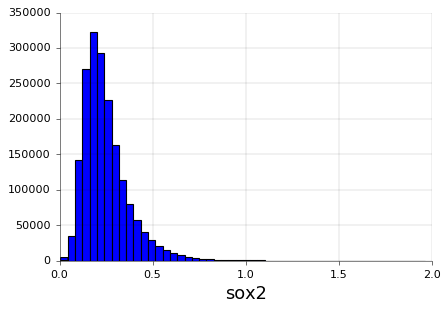

In [43]:
reload(watershed3d)
watershed3d.histogram_pixel([w],'sox2', normalize=1)

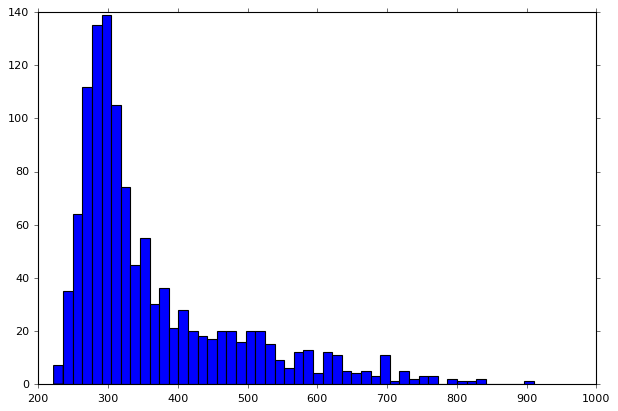

In [27]:
fig,ax=subplots()
ax.hist(w.df['sox2'],bins=50);

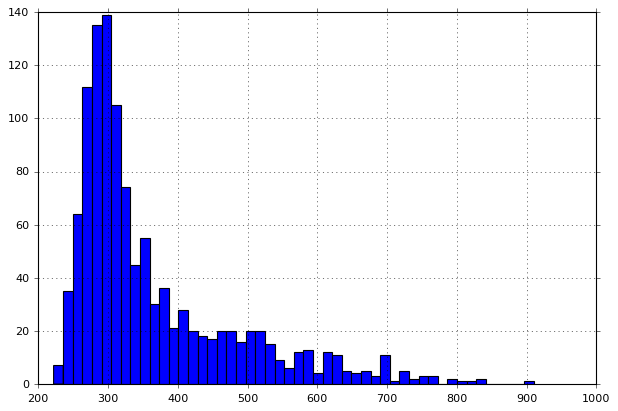

In [20]:
w.df['sox2'].hist(bins=50)

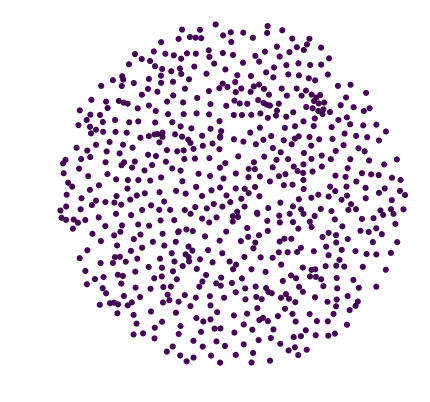

In [13]:
watershed3d.dot_plot(w, 'sox2', color_range=[0,1000000], r_limit=300)

sox2 < 100 and sox17 < 100 = 64.32%
sox2 > 100 and sox17 < 100 = 31.62%
sox2 < 100 and sox17 > 100 = 3.40%
sox2 > 100 and sox17 > 100 = 0.66%


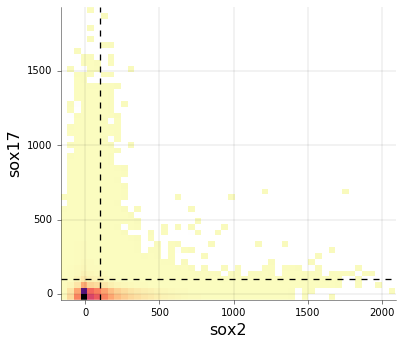

In [277]:
reload(watershed3d)
watershed3d.coexpression_per_pixel(w, 'sox2', 'sox17', gates=[100,100], bins=50, lognorm=False)

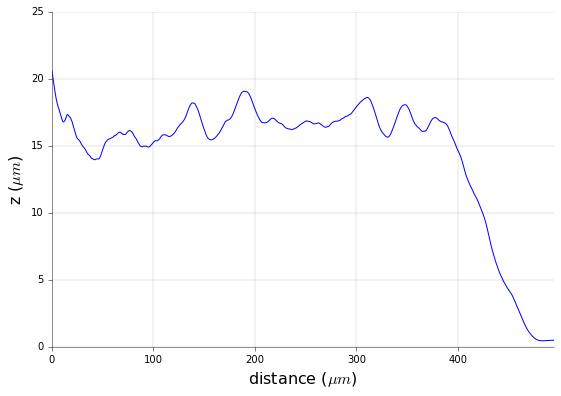

In [274]:
reload(watershed3d)
watershed3d.radial_z_height(w, z_scale=3.);

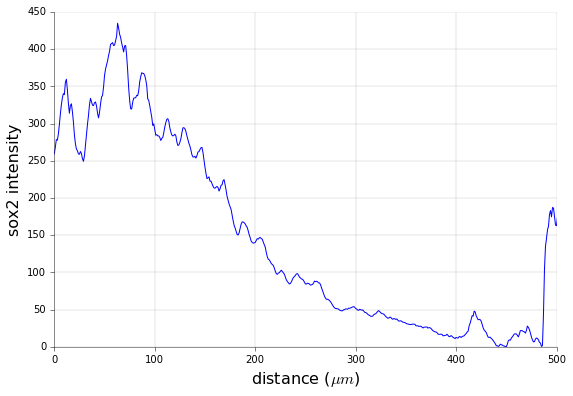

In [154]:
%matplotlib inline
reload(watershed3d)
r,rs = watershed3d.radial_intensity(w, 'sox2', only_selected_nuclei=1, plot=True, binsize=2, xcutoff=500)
# fig,ax=subplots()
# ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
# ax.set_xlim([0,450])
# ax.set_xlabel('r', fontsize=16)
# ax.set_ylabel('Sox2 intensity', fontsize=16)
# watershed3d.nice_spines(ax)

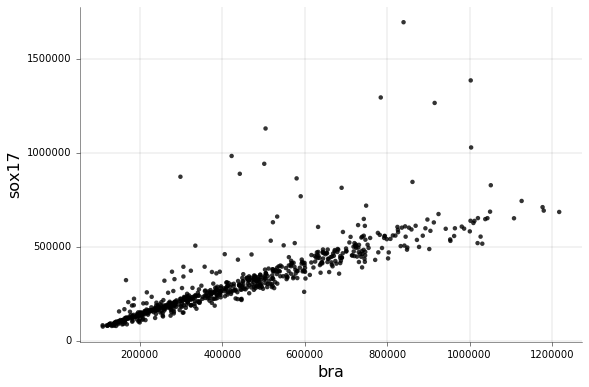

In [48]:
watershed3d.coexpression_per_cell(w, 'bra', 'sox17', only_selected_cells=1)

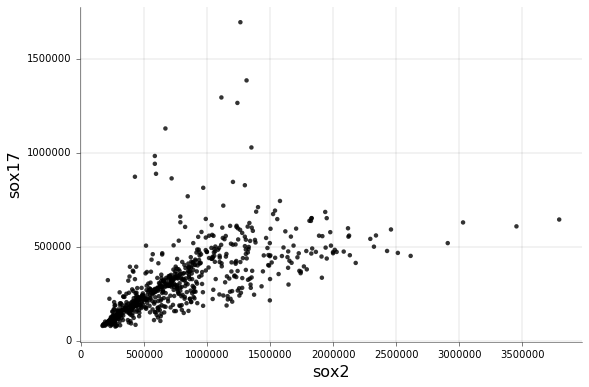

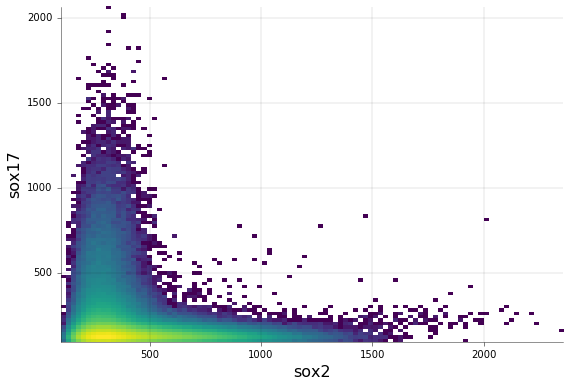

In [57]:
watershed3d.coexpression_per_cell(w, 'sox2', 'sox17', only_selected_cells=1)
watershed3d.coexpression_per_pixel(w, 'sox2', 'sox17', only_selected_cells=1, lognorm=1, bins=100)